Importing Required Libraries and Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's in a CSV file)
file_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv"  # Change this to your actual file path
supermarket_data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(supermarket_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margi

Data Cleaning and Preprocessing, Checking Missing values 

In [4]:
# Check for missing values
print("\nMissing Values:")
print(supermarket_data.isnull().sum())


Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [6]:
#  Check for Duplicate Records

# Check if there are any duplicate rows in the dataset
if supermarket_data.duplicated().any():
    print("\nThere are duplicate records in the dataset.")
else:
    print("\nNo duplicate records found in the dataset.")

# Optionally, check for duplicates based on specific columns
if supermarket_data.duplicated(subset=['Invoice ID', 'Product line']).any():
    print("\nThere are duplicate records based on 'Invoice ID' and 'Product line'.")
else:
    print("\nNo duplicate records based on 'Invoice ID' and 'Product line'.")



No duplicate records found in the dataset.

No duplicate records based on 'Invoice ID' and 'Product line'.


In [7]:
# Convert 'Date' column to datetime
supermarket_data['Date'] = pd.to_datetime(supermarket_data['Date'])

# Convert 'Time' column to datetime (to extract hour)
supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time']).dt.hour

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(supermarket_data.describe())




Descriptive Statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000          

C:\Users\94718\AppData\Local\Temp\ipykernel_21712\1557890761.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time']).dt.hour


Above Descriptive Statistics: A statistical summary of the numerical columns is displayed, including count, mean, standard deviation, min, and max values.

In [8]:
supermarket_data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


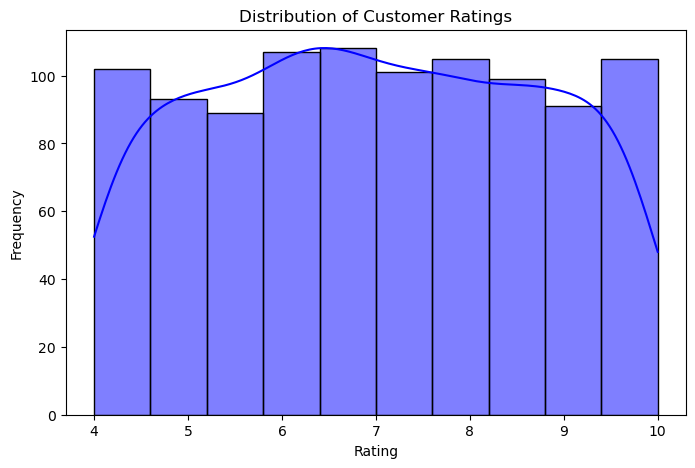

In [10]:
# Visualization: Distribution of Customer Ratings
plt.figure(figsize=(8, 5))
sns.histplot(supermarket_data['Rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

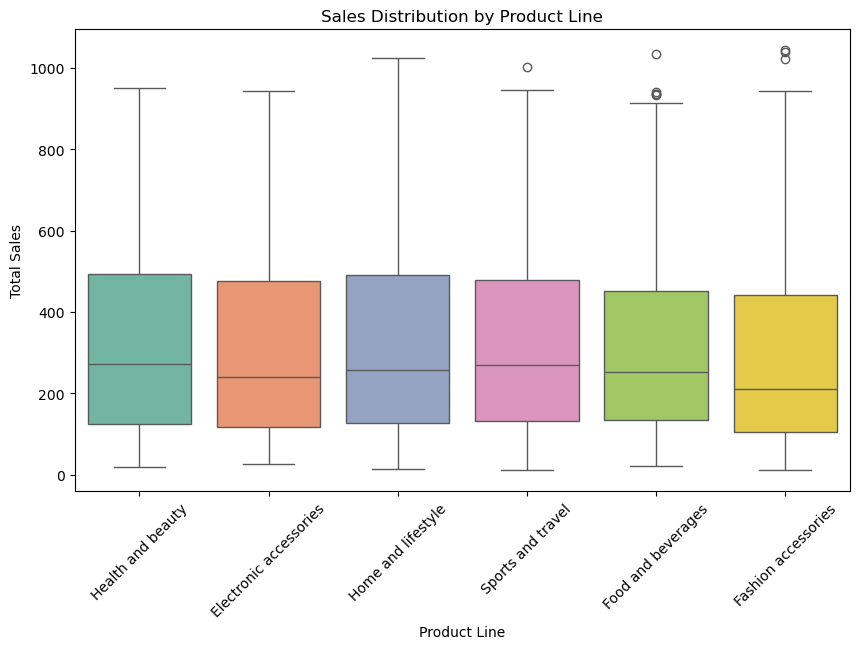

In [19]:
# Visualization: Sales Distribution by Product Line using Boxplot
plt.figure(figsize=(10, 6))

# Assign 'Product line' to hue and disable legend
sns.boxplot(x='Product line', y='Total', data=supermarket_data, palette="Set2", hue='Product line', legend=False)

plt.xticks(rotation=45)
plt.title("Sales Distribution by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()



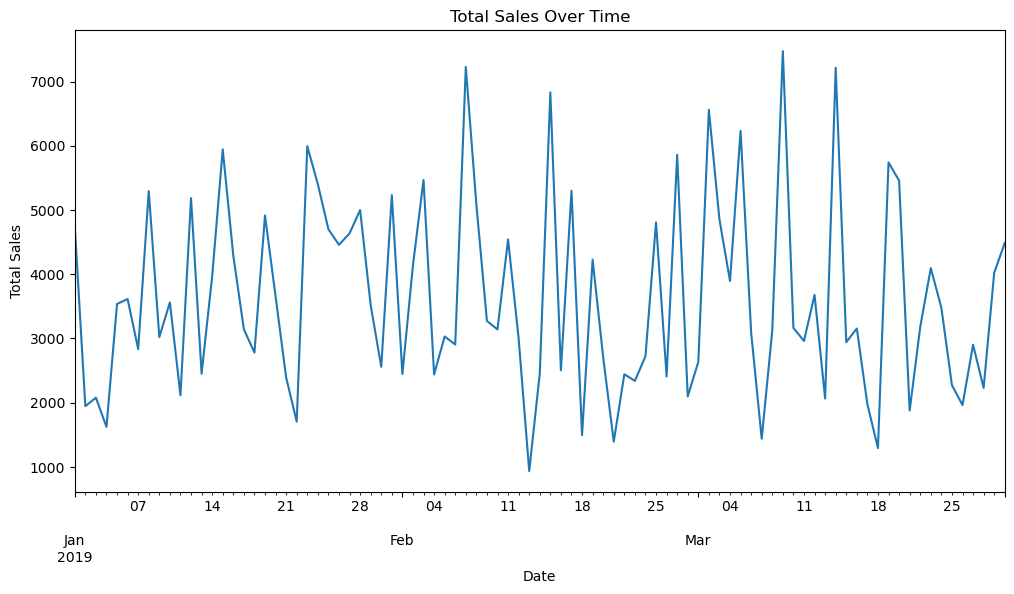

In [12]:
# Visualization: Total Sales Over Time
plt.figure(figsize=(12, 6))
supermarket_data.groupby('Date')['Total'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

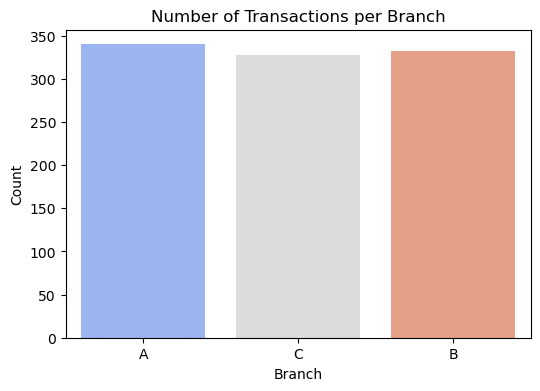

In [18]:
# Visualization: Number of Transactions per Branch
plt.figure(figsize=(6, 4))

# Assign 'Branch' to hue and disable legend
sns.countplot(x='Branch', hue='Branch', data=supermarket_data, palette="coolwarm", legend=False)

plt.title("Number of Transactions per Branch")
plt.xlabel("Branch")
plt.ylabel("Count")
plt.show()


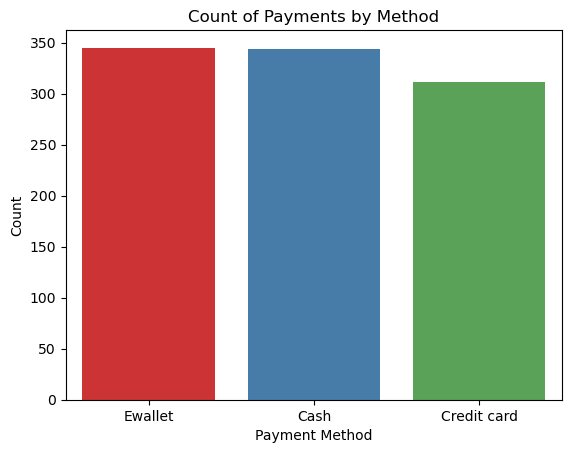

In [15]:
# Fix: Assign x variable to hue and set legend=False
sns.countplot(x='Payment', hue='Payment', data=supermarket_data, palette="Set1", legend=False)

plt.title("Count of Payments by Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

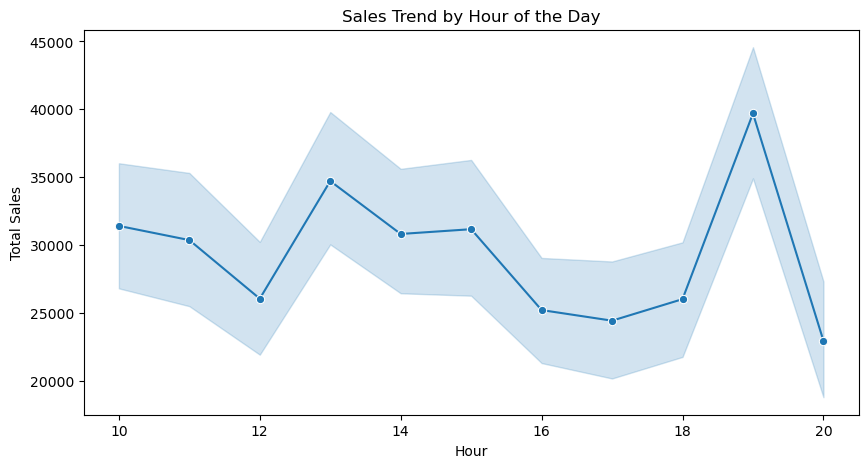

In [16]:
# Visualization: Sales Trend by Hour of the Day
plt.figure(figsize=(10, 5))
sns.lineplot(x=supermarket_data['Hour'], y=df['Total'], estimator='sum', data=df, marker="o")
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()